In [1]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

In [3]:
G = nx.DiGraph()

G.add_node(0)

arr_edges = [[0, 1], [1,  2], [0,  5], [0,  6], [2, 3], [2, 4], [6, 7], [7, 10], [6, 8],
             [6, 9], [9, 11], [9, 12]]

for edge in arr_edges:
  G.add_nodes_from(edge)
  G.add_edge(*edge)

fig, ax = plt.subplots()

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot',
  args="-Grankdir=TB")
nx.draw(G, ax=ax, with_labels=True, node_size=400, node_color="w", edgecolors="k",
        pos=pos)

In [4]:
leaf_nodes = [node for node in G.nodes() if G.out_degree(node) == 0]
leaf_nodes

[5, 3, 4, 10, 8, 11, 12]

Huffman encoding

**procedure** _Huffman($C$: symbols $a_i$ with frequencies $w_i$, $i=1, \ldots, n$)      
$F := $ forest of $n$ rooted trees, each consisting of the single vertex $a_i$ and assigned weight $w_i$    
**while** $F$ is not a tree:    
  &nbsp;&nbsp;&nbsp;&nbsp;
  Replace the rooted trees $T$ and $T'$ of least weights from $F$ with $w(T) \geq w(T')$     
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    with a tree having a new root that has $T$ as its left subtree and $T'$ as its right subtree.    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Label the new edge to $T$ with $0$ and the new edge to $T'$ with 1.    
  &nbsp;&nbsp;&nbsp;&nbsp;
  Assign $w(T) + w(T)'$ as the weight of the new tree.    
  &nbsp;&nbsp;&nbsp;&nbsp;
  **return** \{the Huffman coding for the symbol $a_i$ is the concatenation of the labels     
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    of the edges in the unique path from the root to the vertex $a_i$\} 

In [30]:
# -- initial forest
# labels = ["A", "B", "C", "D", "E", "F"]
# weights = [0.08, 0.10, 0.12, 0.15, 0.20, 0.35]

labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J",
          "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
          "U", "V", "W", "X", "Y", "Z"]
weights = [0.0817, 0.0145, 0.0248, 0.0431, 0.1232, 0.0209, 0.0182, 0.0668, 0.0689, 0.0010,
           0.0080, 0.0397, 0.0277, 0.0662, 0.0781, 0.0156, 0.0009, 0.0572, 0.0628, 0.0905,
           0.0304, 0.0102, 0.0264, 0.0015, 0.0211, 0.0005]


history_labels = {0: labels}
history_weights = {0: weights}

step = 0
while True:
  # print(f"step = {step + 1}")
  unsort_weights = weights[2:] + [sum(weights[:2][::-1])] 
  unsort_labels =  labels[2:] + ["("+" ".join(labels[:2][::-1])+")"]
  # print(unsort_weights)
  # print(unsort_labels)
  idx_sort = np.argsort(unsort_weights)
  weights = [unsort_weights[idx] for idx in idx_sort]
  labels =[unsort_labels[idx] for idx in idx_sort]
  # print(weights)
  # print(labels)
  history_labels[step+1] = labels
  history_weights[step+1] = weights
  
  if len(weights) == 1:
    break
  step += 1


In [31]:
for k, v in history_labels.items():
  print(f"{k:2d}", v)

print("\n\n")
for k, v in history_weights.items():
  print(f"{k:2d}", v)

 0 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
 1 ['Z', 'Q', 'J', 'X', 'K', 'V', 'P', 'G', 'F', 'Y', 'C', 'W', 'M', 'U', 'L', 'D', 'R', 'S', 'N', 'H', 'I', 'O', 'T', '(B A)', 'E']
 2 ['J', '(Q Z)', 'X', 'K', 'V', 'P', 'G', 'F', 'Y', 'C', 'W', 'M', 'U', 'L', 'D', 'R', 'S', 'N', 'H', 'I', 'O', 'T', '(B A)', 'E']
 3 ['X', '((Q Z) J)', 'K', 'V', 'P', 'G', 'F', 'Y', 'C', 'W', 'M', 'U', 'L', 'D', 'R', 'S', 'N', 'H', 'I', 'O', 'T', '(B A)', 'E']
 4 ['(((Q Z) J) X)', 'K', 'V', 'P', 'G', 'F', 'Y', 'C', 'W', 'M', 'U', 'L', 'D', 'R', 'S', 'N', 'H', 'I', 'O', 'T', '(B A)', 'E']
 5 ['V', '(K (((Q Z) J) X))', 'P', 'G', 'F', 'Y', 'C', 'W', 'M', 'U', 'L', 'D', 'R', 'S', 'N', 'H', 'I', 'O', 'T', '(B A)', 'E']
 6 ['P', 'G', 'F', 'Y', '((K (((Q Z) J) X)) V)', 'C', 'W', 'M', 'U', 'L', 'D', 'R', 'S', 'N', 'H', 'I', 'O', 'T', '(B A)', 'E']
 7 ['F', 'Y', '((K (((Q Z) J) X)) V)', 'C', 'W', 'M', 'U', '(G P)', 'L', 'D', 'R', 

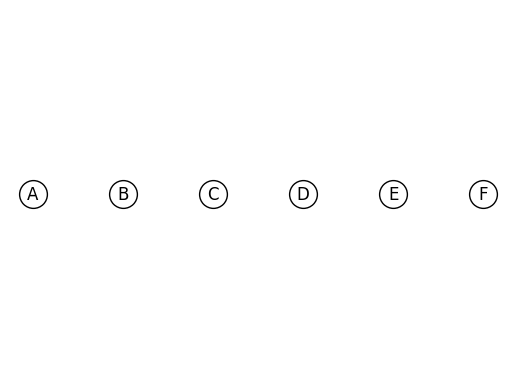

In [17]:
fig, ax = plt.subplots()
G = nx.Graph()

for node in history_steps[0]:
  G.add_node(node)

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot',
  args="-Grankdir=TB")
nx.draw(G, ax=ax, with_labels=True, node_size=400, node_color="w", edgecolors="k",
        pos=pos)

plt.show(fig)